In [2]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [3]:
#importar os dados
dataset = pd.read_csv("tempo.csv", sep=";")
#visualizar
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [4]:
#tamanho
dataset.shape

(14, 5)

In [5]:
grouped = dataset.groupby(["Aparencia"]).size()
grouped

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

dominio = sol, nublado e chuva

menos está fora do domínio

<Axes: xlabel='Aparencia'>

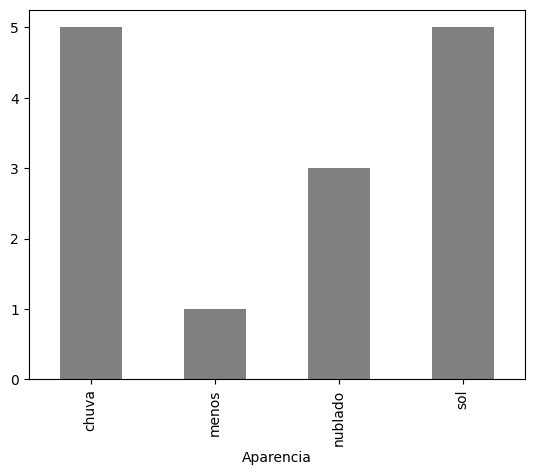

In [6]:
grouped.plot.bar(color= "gray")

In [7]:
grouped = dataset.groupby(["Vento"]).size()
grouped

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

<Axes: xlabel='Vento'>

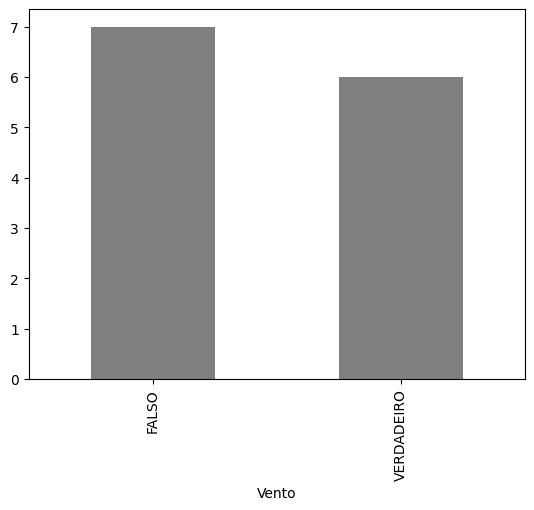

In [8]:
grouped.plot.bar(color= "gray")

In [9]:
grouped = dataset.groupby(["Jogar"]).size()
grouped

Jogar
nao    5
sim    9
dtype: int64

<Axes: xlabel='Jogar'>

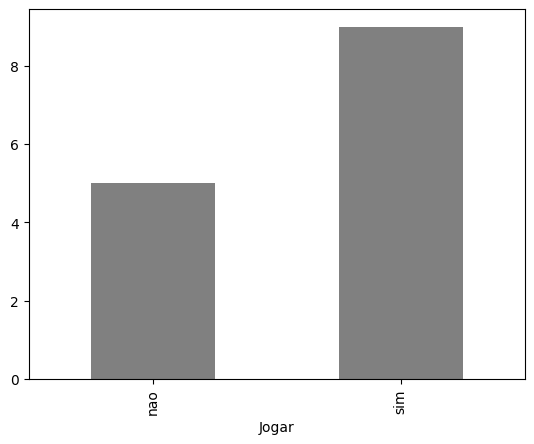

In [10]:
grouped.plot.bar(color= "gray")


In [11]:
dataset["Temperatura"].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

temperatura maxima muito mais alta do que o dominio permite

mediana e media distantes, indicio de outliers

Text(0.5, 1.0, 'Temperatura')

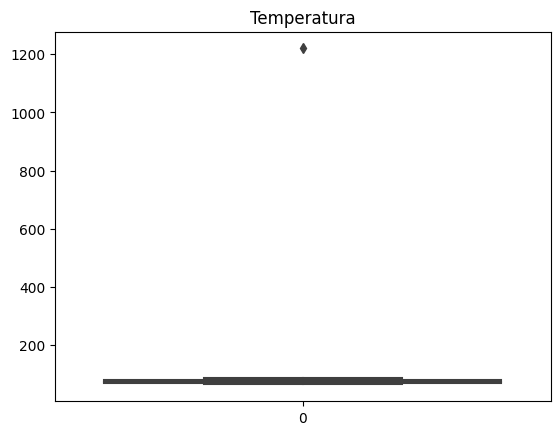

In [12]:
srn.boxplot(dataset["Temperatura"]).set_title("Temperatura")

Text(0.5, 1.0, 'Temperatura')

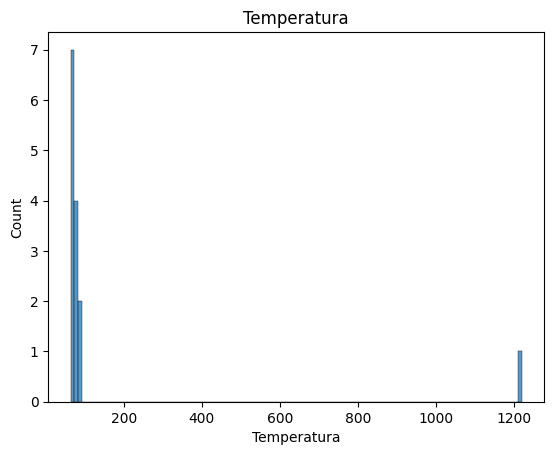

In [13]:
srn.histplot(dataset["Temperatura"]).set_title("Temperatura")


Um outlier de 1200 F

In [14]:
dataset["Umidade"].describe()


count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

valor max além do que o dominio permite

media e mediana próximos

Text(0.5, 1.0, 'Umidade')

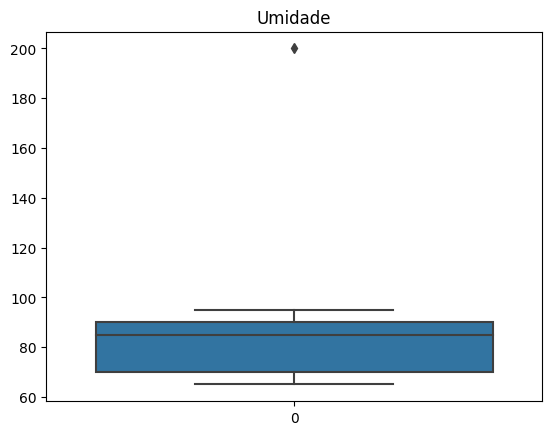

In [15]:
srn.boxplot(dataset["Umidade"]).set_title("Umidade")


Text(0.5, 1.0, 'Umidade')

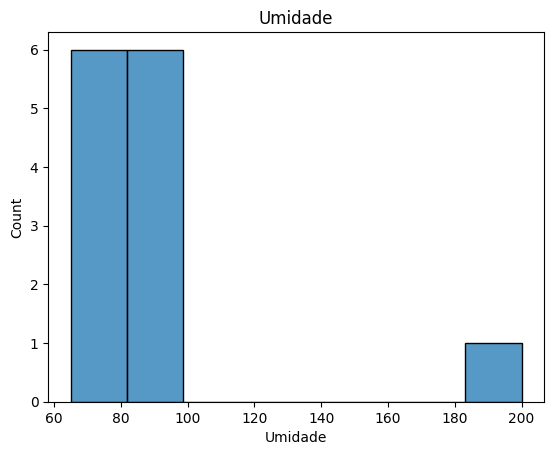

In [16]:
srn.histplot(dataset["Umidade"]).set_title("Umidade")


## Tratamento

In [17]:
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [18]:
grouped = dataset.groupby(["Vento"]).size()
grouped

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [19]:
dataset['Vento'].fillna("FALSO", inplace=True)

In [20]:
dataset['Vento'].isnull().sum()


0

In [21]:
dataset['Umidade'].describe()


count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [22]:
median = sts.median(dataset['Umidade'])
median

85.5

In [23]:
dataset['Umidade'].fillna(median, inplace=True)
dataset['Umidade'].isnull().sum()

0

Corrigido problema dos Nans

In [24]:
grouped = dataset.groupby(["Aparencia"]).size()
grouped

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [25]:
dataset.loc[dataset['Aparencia'] == "menos", "Aparencia"] = "sol"

In [26]:
grouped = dataset.groupby(["Aparencia"]).size()
grouped

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

In [27]:
dataset.loc[(dataset['Temperatura'] < -130 ) | (dataset['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [28]:
median = sts.median(dataset['Temperatura'])
median

73.5

In [29]:
dataset.loc[(dataset['Temperatura'] < -130 ) | (dataset['Temperatura'] > 130), "Temperatura"] = median


In [30]:
dataset.loc[(dataset['Temperatura'] < -130 ) | (dataset['Temperatura'] > 130)]


,Aparencia,Temperatura,Umidade,Vento,Jogar


In [31]:
dataset.loc[(dataset['Umidade'] < 0 ) | (dataset['Umidade'] > 100)]


,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,FALSO,sim


In [32]:
median = sts.median(dataset['Umidade'])
median

85.25

In [33]:
dataset.loc[(dataset['Umidade'] < 0 ) | (dataset['Umidade'] > 100), "Umidade"] = median


In [34]:
dataset.loc[(dataset['Umidade'] < 0 ) | (dataset['Umidade'] > 100)]


,Aparencia,Temperatura,Umidade,Vento,Jogar


In [39]:
dataset.head(14)

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.00,FALSO,nao
1,sol,80.0,90.00,VERDADEIRO,nao
2,nublado,83.0,86.00,FALSO,sim
3,chuva,70.0,85.50,FALSO,sim
4,chuva,68.0,80.00,FALSO,sim
5,chuva,65.0,70.00,VERDADEIRO,nao
6,sol,64.0,65.00,VERDADEIRO,sim
7,sol,73.5,95.00,FALSO,nao
8,sol,69.0,70.00,FALSO,sim
9,chuva,75.0,85.25,FALSO,sim


In [36]:
dataset.shape

(14, 5)